## Housing Project - Phase 2


### Import Housing Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

### Take a look at the data summaries

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Look at number of unique values in a column to determine categorical data
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### Remove Unnecessary Data

In [6]:
#drop columns that we don't need
drop = ['date','id','yr_built', 'yr_renovated', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

data2 = data.drop(columns = drop, axis=1)

In [7]:
data2.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
view             63
condition         0
grade             0
zipcode           0
lat               0
long              0
dtype: int64

In [8]:
#drop null values in waterfront and view columns considering they
#shouldn't impact our analysis
data2.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,98116,47.5773,-122.409
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,98144,47.5944,-122.299


### Differentiate categorical and numerical data, look at relationship between variables

In [9]:
#preliminary identification of cat/ num variables  
cat_var = ['waterfront', 'view', 'condition', 'grade', 
            'zipcode', 'lat','long']
num_var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

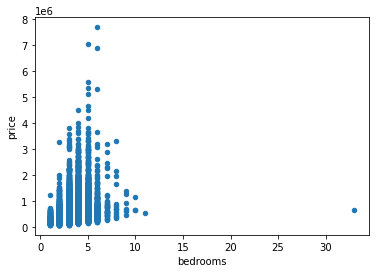

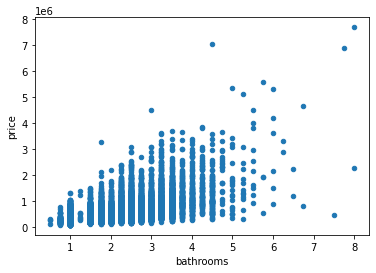

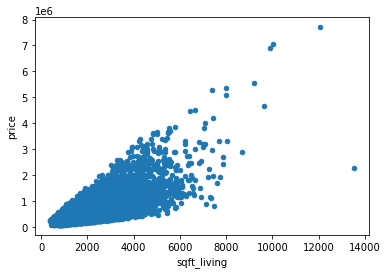

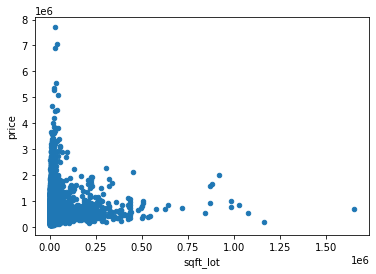

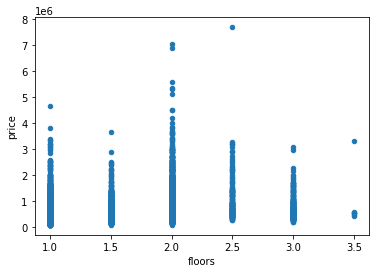

In [10]:
for column in num_var: 
    data2.plot.scatter(x=column, y='price')

In [11]:
data2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045


In [12]:
#create separate categorical and numerical df's
num_data = data2.drop(columns = cat_var)
cat_data = data2.drop(columns = num_var)

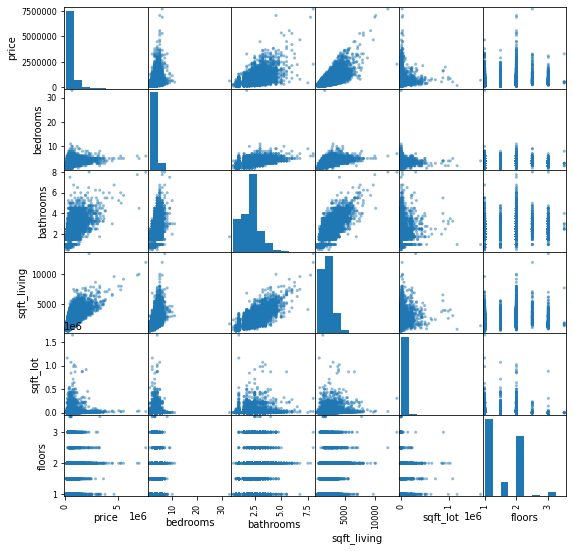

In [13]:
pd.plotting.scatter_matrix(num_data,figsize  = [9, 9]);

In [14]:
#compare variables to check for multicollinearity 
abs(data2.corr()) > 0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
price,True,False,False,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,False,False,False


### Web scrape additional data

#### Dog Park locations

In [15]:
from bs4 import BeautifulSoup
import requests
import re

In [16]:
url_park = 'https://seattle.curbed.com/maps/best-off-leash-dog-parks-seattle'
html_park = requests.get(url_park)
soup_park = BeautifulSoup(html_park.content, 'lxml')

In [17]:
soup_park.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en">
<head>
<title>Seattle’s best dog parks, mapped - Curbed Seattle</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Curbed Seattle" name="apple-mobile-web-app-title"/>
<script src="https://optimize-stats.voxmedia.com/loader.min.js?key=6e52e0ad8b3852a9" type="text/javascript"></script>
<meta content="https://www.facebook.com/pages/Curbed-Seattle/163844227002081" property="article:publisher"/>
<meta content="Sean Keeley" property="author"/>
<meta content="https://www.facebook.com/CurbedSeattle/" property="article:author"/>
<meta content="2018-03-28T14:47:16-07:00" property="article:published_time"/>
<meta content="2019-08-26T11:12:57-07:00" property="article:modified_time"/>
<link as="font" crossorigin="" href="https://cdn.vox-cdn.com/shared_font

In [18]:
parks = soup_park.findAll('h1')
parks

[<h1>Seattle’s 10 best dog parks, mapped</h1>,
 <h1>
 <span class="c-mapstack__card-index">1.</span> Northacres Off-Leash Dog Area</h1>,
 <h1>
 <span class="c-mapstack__card-index">2.</span> Golden Gardens Park</h1>,
 <h1>
 <span class="c-mapstack__card-index">3.</span> Warren G. Magnuson Park off-leash area</h1>,
 <h1>
 <span class="c-mapstack__card-index">4.</span> Woodland Park off-leash area</h1>,
 <h1>
 <span class="c-mapstack__card-index">5.</span> Magnolia Manor Park</h1>,
 <h1>
 <span class="c-mapstack__card-index">6.</span> Regrade Dog Park</h1>,
 <h1>
 <span class="c-mapstack__card-index">7.</span> Dr. Jose Rizal Park</h1>,
 <h1>
 <span class="c-mapstack__card-index">8.</span> Blue Dog Pond</h1>,
 <h1>
 <span class="c-mapstack__card-index">9.</span> Genesee Dog Park</h1>,
 <h1>
 <span class="c-mapstack__card-index">10.</span> Westcrest Park off-leash area</h1>,
 <h1>1. Northacres Off-Leash Dog Area</h1>,
 <h1>2. Golden Gardens Park</h1>,
 <h1>3. Warren G. Magnuson Park off-le

In [19]:
park_names = []
for tag in parks:
    park_names.append(tag.text.strip())
park_names.pop(0)

'Seattle’s 10 best dog parks, mapped'

In [20]:
addresses = soup_park.findAll('div', class_='c-mapstack__info')

In [21]:
park_address = []
for tag in addresses:
    park_address.append(tag.text.strip())

In [22]:
park_adds = []
for park in park_address:
    for index in range(len(park_address)):
        park_adds.append(park_address[index].split('\n')[0].replace('Seattle', ' Seattle'))
park_addresses = park_adds[:10]

In [23]:
dog_parks = dict(zip(park_names, park_addresses))

In [24]:
park_df = pd.DataFrame.from_dict(dog_parks, orient = 'index')
park_df

,0
1. Northacres Off-Leash Dog Area,"12718 1st Ave NE Seattle, WA 98125"
2. Golden Gardens Park,"8498 Seaview Pl NW Seattle, WA 98117"
3. Warren G. Magnuson Park off-leash area,"7400 Sand Point Way NE Seattle, WA 98115"
4. Woodland Park off-leash area,"1000 N 50th St Seattle, WA 98103"
5. Magnolia Manor Park,"3500 28th Ave W Seattle, WA 98199"
6. Regrade Dog Park,"2251 3rd Ave Seattle, WA 98121"
7. Dr. Jose Rizal Park,"1007 12th Ave S Seattle, WA 98144"
8. Blue Dog Pond,"1520 26th Ave S Seattle, WA 98144"
9. Genesee Dog Park,"4513 S Genesee St Seattle, WA 98118"
10. Westcrest Park off-leash area,"SW Henderson St Seattle, WA 98106"


#### Public Transport locations

In [25]:
url_transit = 'https://www.soundtransit.org/ride-with-us/stations/link-light-rail-stations'
html_transit = requests.get(url_transit)
soup_transit = BeautifulSoup(html_transit.content, 'lxml')

In [26]:
link = soup_transit.find_all('a', href=True)
links = []
for l in link:
    links.append(l.get('href'))

transit_links = []
for links in links[54:70]:
    transit_links.append('https://www.soundtransit.org' + links)

In [27]:
container = []
partial = []
first = []
last = []
transit_addresses = []

for link in transit_links:
    r = requests.get(link)
    html_content = r.text
    soup = BeautifulSoup(html_content, 'lxml')

    container = soup.findAll('div', class_='block--location__card-address')
    
    for tag in container: 
        partial.append(tag.text.strip())
        
    for i, add in enumerate(partial):
        if i % 2 == 0:
            first.append(add)
        else:
            last.append(add)
    
    #transit_addresses = list(zip(first, last))

In [29]:
partial

['3720 Montlake Blvd NE',
 'Seattle, WA 98195',
 '140 Broadway E.',
 'Seattle, WA 98102',
 '4th Ave & Pine St.',
 'Seattle, WA 98101',
 '3rd Ave Seneca St',
 'Seattle, WA 98101',
 '3rd Ave & James St',
 'Seattle, WA 98104',
 '5th Ave & S. Jackson St.',
 'Seattle, WA 98104',
 '501 S. Royal Brougham Way',
 'Seattle, WA 98134',
 '500 S Lander St',
 'Seattle, WA 98134',
 '2702 Beacon Ave S',
 'Seattle, WA 98144',
 'Rainier Ave S & S Forest St',
 'Seattle, WA 98144',
 '4818 Martin Luther King Jr Way S.',
 'Seattle, WA 98108',
 '7100 Martin Luther King Jr Way S',
 'Seattle, WA 98118',
 '9132 Martin Luther King Jr Way S',
 'Seattle, WA 98118',
 '3651 Southcenter Blvd',
 'Tukwila, WA 98188',
 'International Blvd & S 176th St',
 'SeaTac, WA 98188',
 '19955 28th Ave South',
 'SeaTac, WA 98188']